In [2]:
from glob import glob
import torch
import torch.optim as optim

import matplotlib.pyplot as plt
import numpy as np
import tqdm

from utils import *

In [3]:
from gym.wrappers import TimeLimit
from env import LibrariesEnv
data_files = glob('data/qualification_round_2020.in/*.txt')
data_file = data_files[0]  # example

train_env = LibrariesEnv(data_file)
train_env = TimeLimit(train_env, train_env.total_days)

In [4]:
SEED = 1234

train_env.seed(SEED)
np.random.seed(SEED)
torch.manual_seed(SEED)

In [5]:
input_dim = train_env.observation_space.shape[0] * train_env.observation_space.shape[1]
hidden_dim = 32
output_dim = train_env.action_space.n

In [6]:
device = torch.device('cpu')

In [7]:
n_runs = 5
max_episodes = 300
discount_factor = 0.99

train_rewards = torch.zeros(n_runs, max_episodes)
test_rewards = torch.zeros(n_runs, max_episodes)
device = torch.device('cpu')

for run in range(n_runs):

    policy = MLP(input_dim, hidden_dim, output_dim)
    policy = policy.to(device)
    policy.apply(init_weights)
    optimizer = optim.Adam(policy.parameters(), lr=1e-2)

    for episode in tqdm.tqdm(range(max_episodes), desc=f'Run: {run}'):

        loss, train_reward = train(train_env, policy, optimizer, discount_factor, device)


        train_rewards[run][episode] = train_reward

Run: 4: 100%|██████████| 300/300 [00:01<00:00, 218.63it/s]


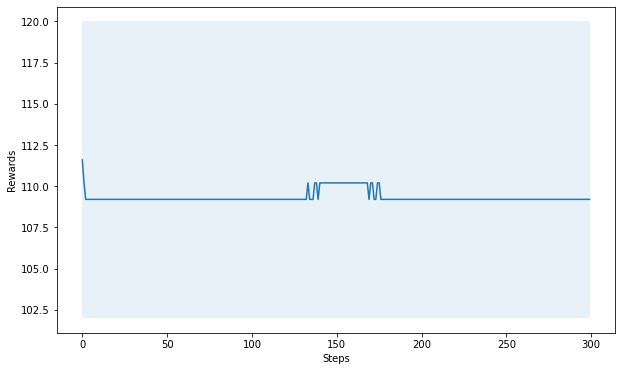

In [12]:
idxs = range(max_episodes)
fig, ax = plt.subplots(1, figsize=(10,6))
ax.plot(idxs, train_rewards.mean(0))
ax.fill_between(idxs, train_rewards.min(0).values, train_rewards.max(0).values, alpha=0.1)
ax.set_xlabel('Steps')
ax.set_ylabel('Rewards');

In [10]:
train_rewards

tensor([[107., 113., 120.,  ..., 120., 120., 120.],
        [120., 114., 102.,  ..., 102., 102., 102.],
        [120., 120., 120.,  ..., 120., 120., 120.],
        [109., 102., 102.,  ..., 102., 102., 102.],
        [102., 102., 102.,  ..., 102., 102., 102.]])